## Average Salaries of Respondents by Language and Age

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import pylab
import numpy as np


In [2]:
data = pd.read_csv("C:/Users/MSI/Desktop/data-science-projects/project-2/survey_results_public.csv")

In [3]:
data = data[["Age", "ConvertedComp", "LanguageWorkedWith"]]
data.head(3)

,Age,ConvertedComp,LanguageWorkedWith
0,14.0,NaN,HTML/CSS;Java;JavaScript;Python
1,19.0,NaN,C++;HTML/CSS;Python
2,28.0,8820.0,HTML/CSS


In [4]:
data = data[(data["Age"] >= 18) & (data["Age"] <= 40)]
data["Age"] = data["Age"].round()
data.head()

,Age,ConvertedComp,LanguageWorkedWith
1,19.0,NaN,C++;HTML/CSS;Python
2,28.0,8820.0,HTML/CSS
3,22.0,61000.0,C;C++;C#;Python;SQL
4,30.0,NaN,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA
5,28.0,366420.0,Java;R;SQL


In [5]:
all_dev_sal = data.groupby("Age")["ConvertedComp"].median().dropna()
all_dev_sal_list = all_dev_sal.tolist()

ages_list = data["Age"].sort_values().unique().tolist()
ages_list = [int(number) for number in ages_list]

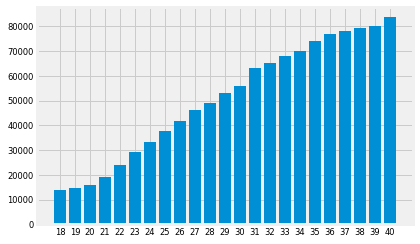

In [27]:
resp_know_python = data[data["LanguageWorkedWith"].str.contains("Python", na=False)]
python_age_and_salary = resp_know_python.groupby("Age")["ConvertedComp"].median()
python_salaries_list = python_age_and_salary.to_list()

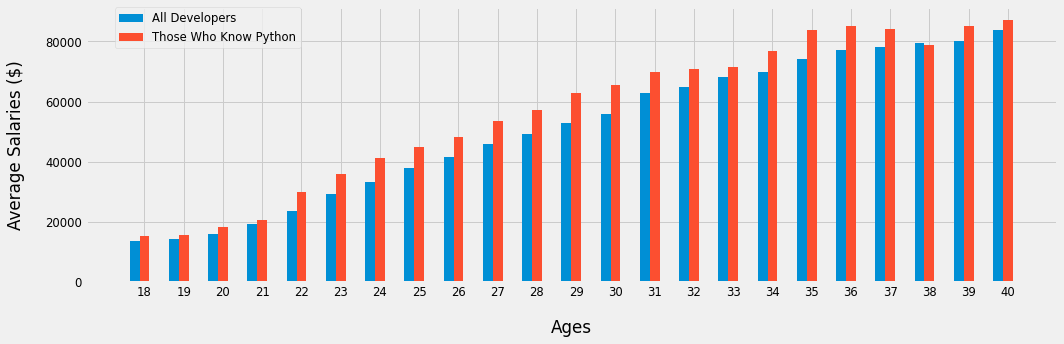

In [45]:
plt.style.use("fivethirtyeight")

params = {'legend.fontsize': 'small',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'large',
         'axes.titlesize':'small',
         'xtick.labelsize':'small',
         'ytick.labelsize':'small'}
pylab.rcParams.update(params)

x_indexes = np.arange(len(ages_list))
width = 0.25

plt.bar(x_indexes - width, all_dev_sal_list, width=width, label="All Developers")
plt.bar(x_indexes, python_salaries_list, width=width, label="Those Who Know Python")

plt.xticks(ticks=x_indexes, labels=ages_list)
plt.xlabel("Ages", labelpad=20)
plt.ylabel("Average Salaries ($)", labelpad=20)
plt.tight_layout()
plt.legend(loc=(0.03, 0.85))

plt.show()